# Data exploration & Cross validation

In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

Your numpy version: 1.21.5 (need at least 1.7.1)
Your SciPy version:  1.9.1 (need at least 0.12.0)
Your Pandas version:  1.4.4 (need at least 0.11.0)
Your Mapltolib version:  3.5.2 (need at least 1.2.1)
Your Scikit-Learn version:  1.0.2 (need at least 0.13.1)


## Data Exploration

In [6]:
import matplotlib.pyplot as plt

In [5]:
flights_df= pd.read_csv('flights/flights.csv')

In [4]:
print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [7]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


(a) How many flights were there from NYC airports to Seattle in 2013?

In [8]:
# Filtering by destination and getting the length
flights_df1=flights_df[ flights_df.dest=='SEA']
len(flights_df1.index)

3923

(b) How many airlines fly from NYC to Seattle?

In [9]:
# getting all unique carriers
print(flights_df1['carrier'].unique())

['AS' 'DL' 'UA' 'B6' 'AA']


(c) How many unique air planes fly from NYC to Seattle?

In [10]:
# getting all unique tailnumbers
len(flights_df1['tailnum'].unique())

936

(d) What is the average arrival delay for flights from NC to Seattle?

In [11]:
#getting mean of arrival delay
flights_df1['arr_delay'].mean()

-1.0990990990990992

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [12]:
#Method 1 : for loop

# getting the distinct airports for NYC -> SEA
nyc_ports = flights_df1['origin'].unique()
print("Airports:", nyc_ports)
# getting total flights
total_flights = len(flights_df1)
print("Total flights:", total_flights)

#iterate on the distinct airports and calc the propotion
for airport in nyc_ports:
    prop = len(flights_df1[flights_df.origin==airport])/total_flights
    print("Propotion of flights from ", airport , ": " , prop)

# Method 2 : pandas
s = flights_df1.origin
prop = s.value_counts(normalize=True)
print(pd.DataFrame({'propotion': prop}))



Airports: ['EWR' 'JFK']
Total flights: 3923
Propotion of flights from  EWR :  0.46673464185572267
Propotion of flights from  JFK :  0.5332653581442773
     propotion
JFK   0.533265
EWR   0.466735


C:\Users\rahul\AppData\Local\Temp\ipykernel_13892\3717333685.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prop = len(flights_df1[flights_df.origin==airport])/total_flights


 Propotion of flights from JFK to SEA is 0.533.
 Propotion of flights from EWR to SEA is 0.467.

Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [13]:
#grouping by month and day and calc mean departure and and arrival delay 
df_temp = flights_df.groupby(['month', 'day'])[['dep_delay', 'arr_delay']].mean()


max_dep_delay = df_temp['dep_delay'].max()
print("Max dept. delay: ", max_dep_delay)
print("Largest avg. departure delay was observered on: ")
print(df_temp.query('dep_delay == dep_delay.max()'))


max_arr_delay = df_temp['arr_delay'].max()
print("Max arrival. delay: ", max_arr_delay)
print("Largest avg. arrival delay was observered on: ")
print(df_temp.query('arr_delay == arr_delay.max()'))

Max dept. delay:  83.5369211514393
Largest avg. departure delay was observered on: 
           dep_delay  arr_delay
month day                      
3     8    83.536921  85.862155
Max arrival. delay:  85.86215538847118
Largest avg. arrival delay was observered on: 
           dep_delay  arr_delay
month day                      
3     8    83.536921  85.862155


Both largest avg. arrival delay and largest avg. departure delay was observed on the same day which is 8th March 2013

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [14]:
# assuming total delay to be a sum of dep_delay and arr_delay

#grouping by month and day and calc mean departure and and arrival delay and adding the 2 
df_temp = flights_df.groupby(['month', 'day'])[['dep_delay', 'arr_delay']].mean()
df_temp['net_delay'] = df_temp['dep_delay'] + df_temp['arr_delay']
max_net_delay = df_temp['net_delay'].max()
print(max_net_delay)
print(df_temp[ df_temp.net_delay==max_net_delay])

169.39907653991048
           dep_delay  arr_delay   net_delay
month day                                  
3     8    83.536921  85.862155  169.399077


Worst day to fly out of NYC is 8th March 2013

(c) Are there any seasonal patterns in departure delays for flights from NYC?

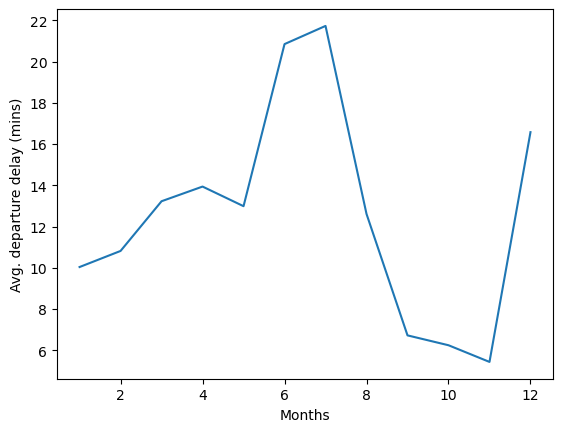

In [15]:
#grouping by month to see seasonal patterns
df_temp = flights_df.groupby(['month'])[['dep_delay']].mean()
df_temp = df_temp.reset_index()
plt.plot(df_temp["month"], df_temp["dep_delay"])
plt.xlabel("Months")
plt.ylabel("Avg. departure delay (mins)")
plt.show()

The starting months see average departure delays and in the Fall the departure delays increase significantly. This is followed by very low departure delays from September to November. In December we see an increase in departure delays

(d) On average, how do departure delays vary over the course of a day?

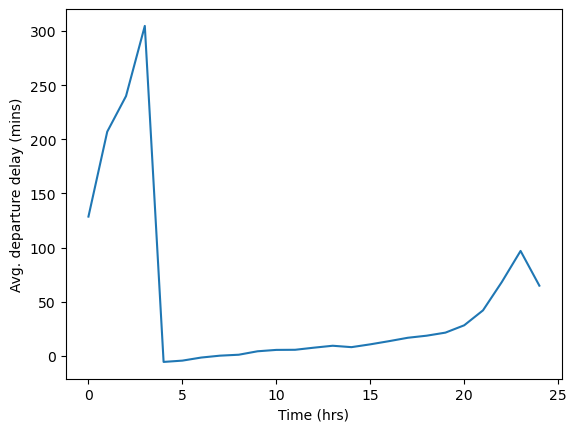

In [16]:
#grouping by hour to see the mean of delay over the day
df_temp = flights_df.groupby(['hour'])[['dep_delay']].mean()
df_temp = df_temp.reset_index()
plt.plot(df_temp["hour"], df_temp["dep_delay"])
plt.xlabel("Time (hrs)")
plt.ylabel("Avg. departure delay (mins)")
plt.show()

Departure delays are at the highest in early hours from 12am to 3am, after which it drops to a low. We see a slight increase in the departure delay throughout the day after that.

Which flight departing NYC in 2013 flew the fastest?

In [17]:
df_temp = flights_df
df_temp['speed'] = df_temp['distance']/(df_temp['air_time']) #adding colm for speed

print(df_temp.query('speed == speed.max()')) 

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25    1709.0        9.0    1923.0   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447      -14.0      DL  N666DN    1499    LGA  ATL      65.0       762   

        hour  minute      speed  
216447  17.0     9.0  11.723077  


The fastest flight was from LGA to ATL with a speed of 11.72 km/min by carrier DL.

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [18]:
df2 = flights_df.groupby(['carrier','flight','dest'])["year"].count().reset_index(name="count")
df2.query("count == 365",inplace=True) # getting the once which flew everyday
print(len(df2.index))
print(df2['dest'].unique())

18
['SFO' 'LAX' 'SJU' 'MIA' 'CLT' 'BUR' 'FLL' 'SRQ' 'MCO' 'TPA' 'IAD' 'HNL'
 'LAS']


There are a total of 18 flights which happen every day and they travel to the following destinations - 'SFO' 'LAX' 'SJU' 'MIA' 'CLT' 'BUR' 'FLL' 'SRQ' 'MCO' 'TPA' 'IAD' 'HNL' 'LAS'

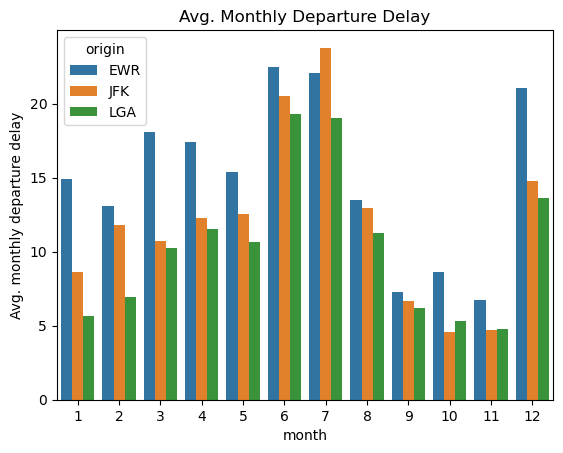

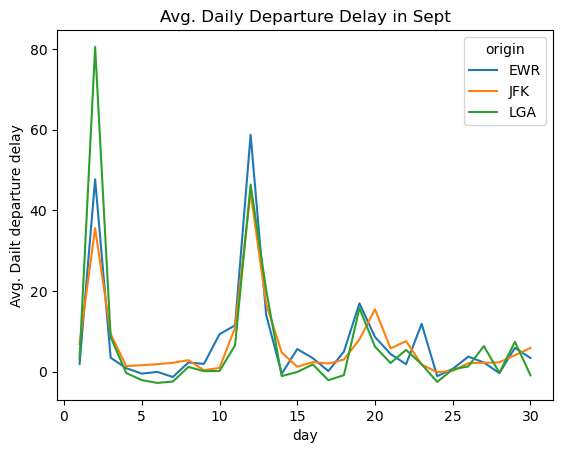

In [80]:
# Which NYC airport experiences more delays monthly?

df_temp = flights_df.groupby(['month','origin'])[['dep_delay']].mean()
df_temp = df_temp.reset_index()

#monthly avg dept delay
ax = sns.barplot(x='month', y='dep_delay', data=df_temp, hue='origin', dodge=True)
plt.title("Avg. Monthly Departure Delay")
plt.ylabel("Avg. monthly departure delay")
plt.show()

# daily dept delay for Sept
df_sept = flights_df.query("month == 9")
df_sept = df_sept.groupby(['day','origin'])[['dep_delay']].mean()
df_sept = df_sept.reset_index()

sns.lineplot(data=df_sept, x='day', y='dep_delay', hue='origin')
plt.title("Avg. Daily Departure Delay in Sept")
plt.ylabel("Avg. Dailt departure delay")
plt.show()

Question - Which NYC airport experiences more delays monthly?

From the 1st visualization we can see that the monthly departure delay for EWR is always more compared to the other 2, apart from in the month on July, which is kind of an indication to prefer other airports over this. LGA has the lowest departure delay amonst the 3 and can be prefered.
Since we see very close average departure delays for the month of Sept. We can dive deeper and get more details for the same.

In the second graph we see a more detailed view of the departure delays accross the month on Sept. which could help decide an airport for travel

What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

   Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0           1    EWR  2013    1.0  1.0   0.0  37.04  21.92  53.97     230.0   
1           2    EWR  2013    1.0  1.0   1.0  37.04  21.92  53.97     230.0   

   wind_speed  wind_gust  precip  pressure  visib  
0    10.35702  11.918651     0.0    1013.9   10.0  
1    13.80936  15.891535     0.0    1013.0   10.0  
   Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
5           6    EWR  2013      1    1   6.0  39.02  26.06  59.37     270.0   
6           6    EWR  2013      1    1   6.0  39.02  26.06  59.37     270.0   

   wind_speed  wind_gust  precip  pressure  visib  dep_delay  
5    10.35702  11.918651     0.0    1012.0   10.0        1.0  
6    10.35702  11.918651     0.0    1012.0   10.0       -4.0  
(100806, 16)


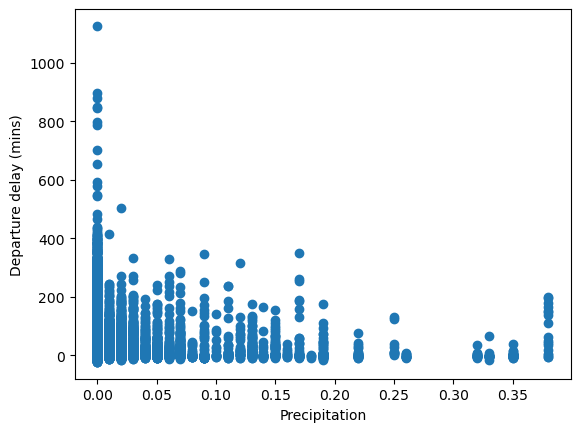

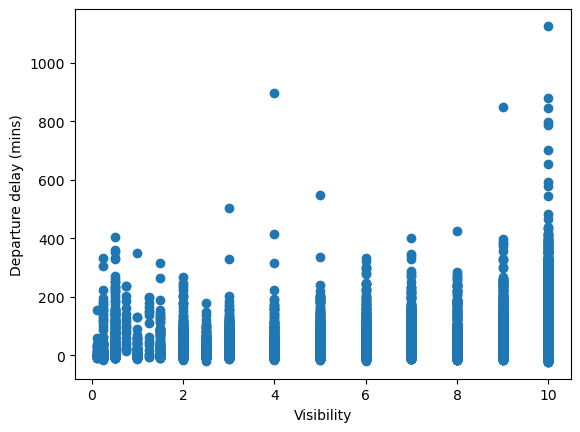

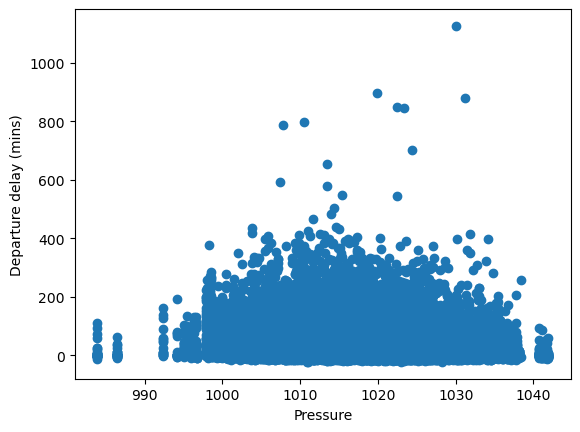

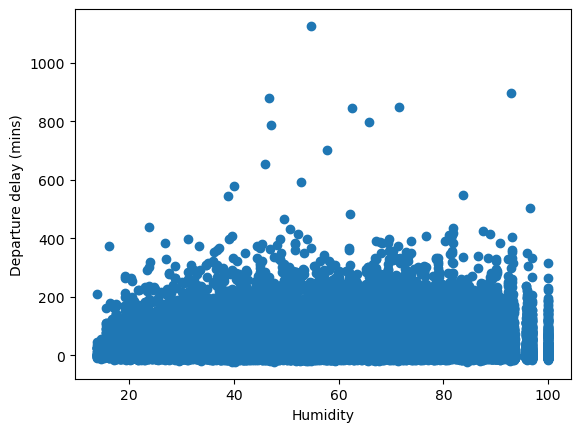

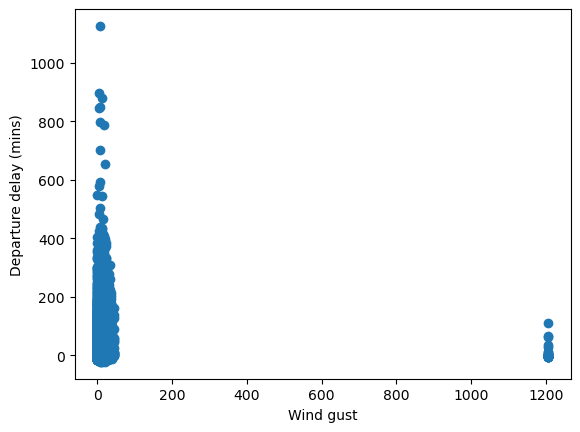

In [61]:
cols_flights = ["month", "day", "origin", "dep_delay", "hour"]
flight_selected = flights_df[cols_flights]

weather = pd.read_csv('./weather.csv')
print(weather.head(2))
# converting month and dat to int values
weather = weather.dropna()
weather['day'] = weather['day'].astype(np.int64)
weather['month'] = weather['month'].astype(np.int64)

#merging the two datasets
merged_df = pd.merge(weather, flight_selected,  how='left', 
                     left_on=['month','day','hour', 'origin'], right_on = ['month','day','hour', 'origin'])
merged_df = merged_df.dropna()
print(merged_df.head(2))
print (merged_df.shape)

#visualizations
plt.scatter(merged_df["precip"], merged_df["dep_delay"])
plt.xlabel("Precipitation")
plt.ylabel("Departure delay (mins)")
plt.show()

plt.scatter(merged_df["visib"], merged_df["dep_delay"])
plt.xlabel("Visibility")
plt.ylabel("Departure delay (mins)")
plt.show()

plt.scatter(merged_df["pressure"], merged_df["dep_delay"])
plt.xlabel("Pressure")
plt.ylabel("Departure delay (mins)")
plt.show()

plt.scatter(merged_df["humid"], merged_df["dep_delay"])
plt.xlabel("Humidity")
plt.ylabel("Departure delay (mins)")
plt.show()

plt.scatter(merged_df["wind_gust"], merged_df["dep_delay"])
plt.xlabel("Wind gust")
plt.ylabel("Departure delay (mins)")
plt.show()


# It is difficult to find patterns or relations in weather condition and dep_delay 
# as we do not have enough data points on all conditions or any visible pattern either.  

## cross validation

In [32]:
import seaborn as sns
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.neighbors import KNeighborsRegressor # for kNN
from sklearn import preprocessing # for scaling the data
from sklearn.model_selection import KFold, cross_validate # for Cross-validation
from sklearn.metrics import r2_score, mean_squared_error
np.random.seed(371)

In [39]:
df = pd.read_csv('./lab1_data.csv')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,694,5.94,3.55,42.64,36
1,Quest,Azamara,6,30.277,694,5.94,3.55,42.64,36
2,Celebration,Carnival,26,47.262,1486,7.22,7.43,31.80,67
3,Conquest,Carnival,11,110.000,2974,9.53,14.88,36.99,191
4,Destiny,Carnival,17,101.353,2642,8.92,13.21,38.36,100


In [40]:
# pick some columns for our practice
cols = ["Tonnage", "length", "cabins", "crew", "passengers"]

df_selected = df[cols]

df_selected.describe()

,Tonnage,length,cabins,crew,passengers
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,71.284671,8.130633,8.830000,78.012658,1845.740506
std,37.229540,1.793474,4.471417,35.020283,967.709478
min,2.329000,2.790000,0.330000,6.000000,66.000000
25%,46.013000,7.100000,6.132500,55.250000,1253.500000
50%,71.899000,8.555000,9.570000,81.500000,1950.000000
75%,90.772500,9.510000,10.885000,100.000000,2484.500000
max,220.000000,11.820000,27.000000,210.000000,5400.000000


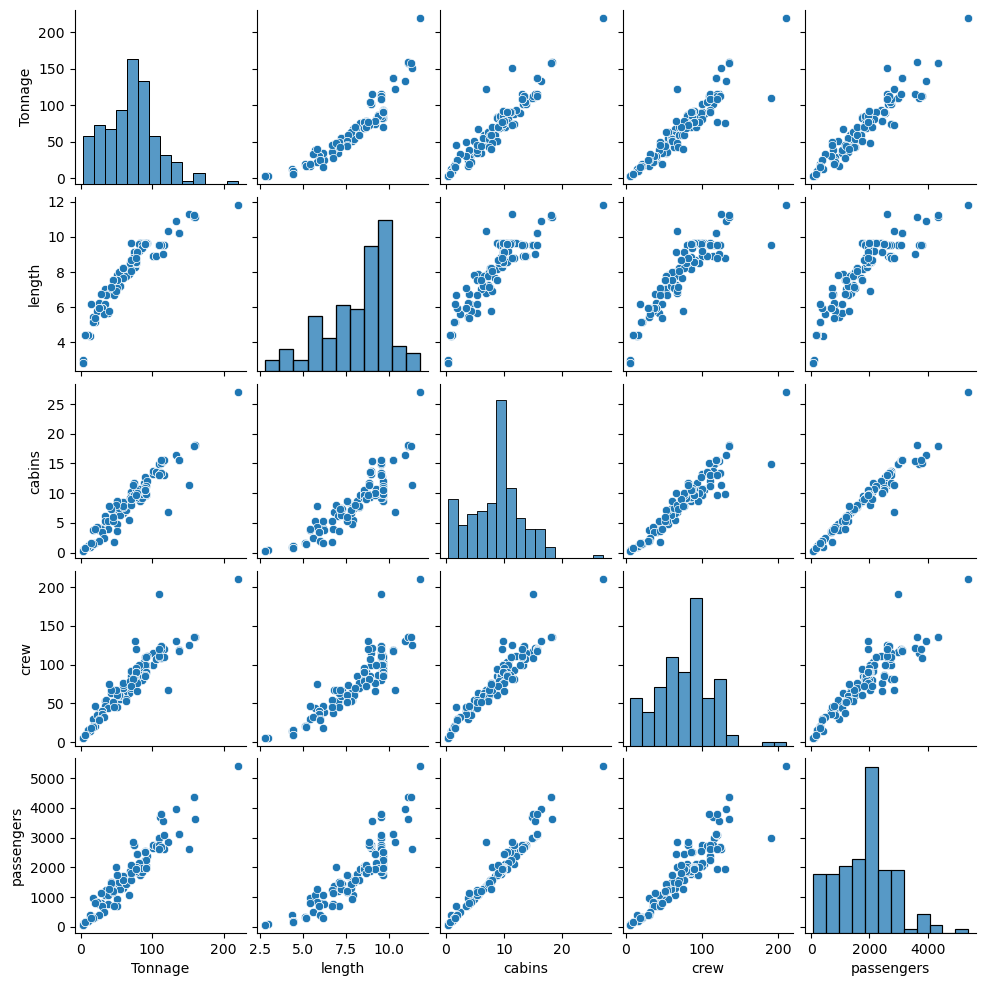

In [41]:
sns.pairplot(df_selected, height=2.0)

We can see that all the features show a positive linear relationship with each other.

## Prepare the data using cross validation


In [42]:
x_cols = ["Tonnage", "length", "cabins", "crew"]
y_col = "passengers"

X_full = df_selected[x_cols]
y_full = df_selected[y_col]

In [43]:
cv_split = KFold(n_splits=5, shuffle=True, random_state=371) # random state ensures reproducable output across multiple function calls

In [44]:
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train] #gets elements from x_full by index defined by the split for train data
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    print(X_train.shape, X_test.shape)

(126, 4) (32, 4)
(126, 4) (32, 4)
(126, 4) (32, 4)
(127, 4) (31, 4)
(127, 4) (31, 4)


## Compare LR and KNN (k=3)


In [45]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)

In [49]:
# 2 types of error
r2_lr_list = []
mse_lr_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # linear regression
    m_lr = lr.fit(X_train, y_train)
    y_pred = m_lr.predict(X_test)
    
    # R^2
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    r2_lr_list.append(r2_lr)
    
    # mean squared error
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_lr_list.append(mse_lr)

print("average R2 score for linear regression:", np.mean(r2_lr_list))
print("average MSE linear regression:", np.mean(mse_lr_list))

average R2 score for linear regression: 0.9480419620768963
average MSE linear regression: 41375.769664874286


## Question 2: Following the example, training a KNN model (K=3). What do you find? Which model has better performance?


In [50]:
r2_knn_list = []
mse_knn_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # KNN k=3
    m_knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # R^2
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    r2_knn_list.append(r2_knn)
    
    # mean squared error
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_knn_list.append(mse_knn)

print("average R2 score for knn:", np.mean(r2_knn_list))
print("average MSE knn:", np.mean(mse_knn_list))

# lr model has a higher r2 value and a lower mse compared to knn, 
# which means lr is a better model for the given data.

average R2 score for knn: 0.884477051324499
average MSE knn: 104453.68064516128


In [51]:
metrics = ('r2', 'neg_mean_squared_error')

results_lr = cross_validate(estimator=lr, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
results_knn = cross_validate(estimator=knn, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)

In [52]:
print(results_lr)
print(results_knn)

{'fit_time': array([0.00399995, 0.0030005 , 0.0030005 , 0.00200057, 0.00300121]), 'score_time': array([0.00299668, 0.00299978, 0.00099921, 0.00200105, 0.00100017]), 'test_r2': array([0.97581596, 0.9508146 , 0.96105864, 0.87857793, 0.97394268]), 'train_r2': array([0.95334727, 0.96172013, 0.96041017, 0.97190647, 0.95634131]), 'test_neg_mean_squared_error': array([-33643.29805604, -31760.63421478, -33538.33128831, -86406.84704642,
       -21529.73771883]), 'train_neg_mean_squared_error': array([-37477.03868869, -38280.1317768 , -37520.51317443, -27045.66461286,
       -40418.56065386])}
{'fit_time': array([0.00200033, 0.00300002, 0.00300241, 0.00199485, 0.00200009]), 'score_time': array([0.00300169, 0.00299788, 0.0029974 , 0.00300312, 0.00200033]), 'test_r2': array([0.85185038, 0.81890728, 0.91144667, 0.92076564, 0.91941529]), 'train_r2': array([0.95157403, 0.9493979 , 0.93924867, 0.94538919, 0.94806151]), 'test_neg_mean_squared_error': array([-206096.31597222, -116937.54513889,  -76266.7

In [53]:
print("average R2 score for LR:", results_lr["test_r2"].mean())
print("average R2 score KNN:", results_knn["test_r2"].mean())

print("average MSE linear regression:", results_lr["test_neg_mean_squared_error"].mean())
print("average MSE for KNN:", results_knn["test_neg_mean_squared_error"].mean())

average R2 score for LR: 0.9480419620768963
average R2 score KNN: 0.884477051324499
average MSE linear regression: -41375.769664874286
average MSE for KNN: -104453.68064516128


In [55]:
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_new_row = pd.DataFrame({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, index=[0])
    df_results = pd.concat([df_results, df_new_row])

df_results

,k,train_error,test_error
0,1.0,0.707662,97398.440927
0,2.0,28912.104934,96073.377369
0,3.0,49547.528087,104453.680645
0,4.0,62332.739825,113585.690008
0,5.0,72863.877286,118126.571411
0,6.0,80880.750423,121470.790177
0,7.0,84954.388989,118869.699650
0,8.0,88829.892194,123161.196072
0,9.0,90639.171359,116838.024111
0,10.0,94161.924545,114674.361974


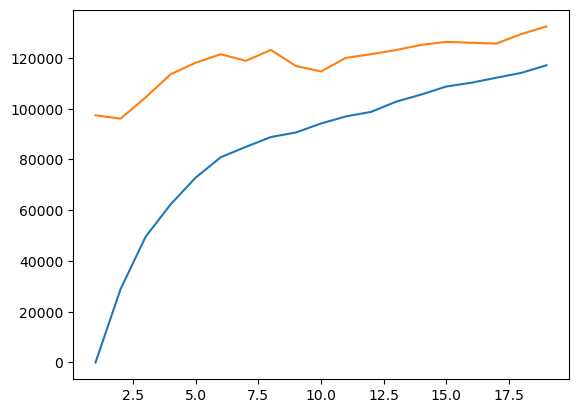

In [147]:
plt.plot(df_results['k'], df_results['train_error'])
plt.plot(df_results['k'], df_results['test_error'])

In [56]:
scaler = preprocessing.StandardScaler()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

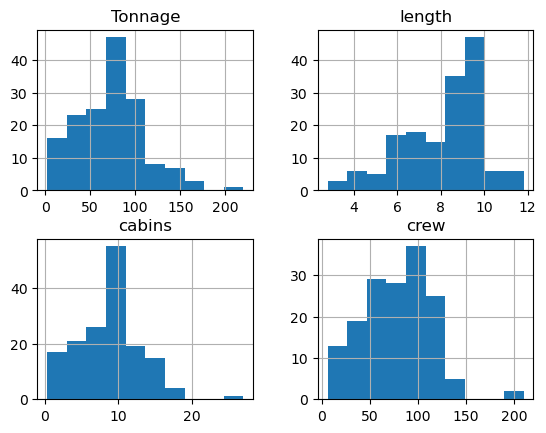

In [57]:
X_full.hist()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

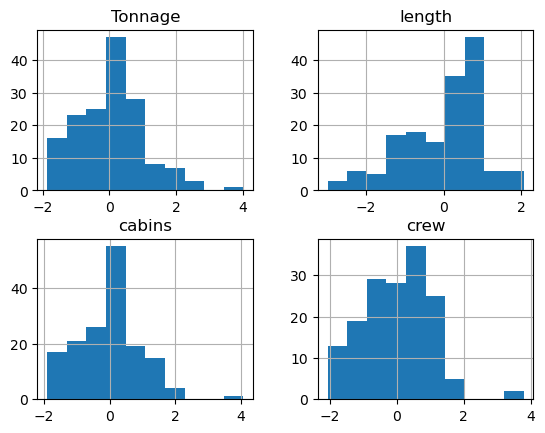

In [58]:
X_full_transform = scaler.fit(X_full).transform(X_full)
# same results:
# X_full_transform = scaler.fit_transform(X_full)

X_full_transform = pd.DataFrame(X_full_transform, columns=X_full.columns)
X_full_transform.hist()

In [59]:
r2_lr_list_scale = []
mse_lr_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_lr = lr.fit(X_train_standard, y_train)
    y_pred = m_lr.predict(X_test_standard)
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_lr_list_scale.append(r2_lr)
    mse_lr_list_scale.append(mse_le)
    
print("Scaled:")    
print("average R2 score:", np.mean(r2_lr_list_scale))
print("average MSE:", np.mean(mse_lr_list_scale))

print("Not Scaled:")  
print("average R2 score:", np.mean(r2_lr_list))
print("average MSE:", np.mean(mse_lr_list))

Scaled:
average R2 score: 0.9480419620768963
average MSE: 41375.76966487426
Not Scaled:
average R2 score: 0.9480419620768963
average MSE: 41375.769664874286


## Question 5: Following the example, train a KNN (K=3) model with the scaling.


In [60]:
r2_knn_list_scale = []
mse_lr_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_knn = knn.fit(X_train_standard, y_train)
    y_pred = m_knn.predict(X_test_standard)
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_knn_list_scale.append(r2_lr)
    mse_lr_list_scale.append(mse_le)
    
print("Scaled:")    
print("average R2 score:", np.mean(r2_lr_list_scale))
print("average MSE:", np.mean(mse_lr_list_scale))

print("Not Scaled:")  
print("average R2 score:", np.mean(r2_knn_list))
print("average MSE:", np.mean(mse_knn_list))

Scaled:
average R2 score: 0.9480419620768963
average MSE: 69673.52674731184
Not Scaled:
average R2 score: 0.884477051324499
average MSE: 104453.68064516128


In [ ]:
# In Knn where the distance metric helps determine the classification, if the features are on different scales,
# then the features with larger scales will dominate the distance metric and skew the results. 
# Hence scaling in such case will improve the performance, like we see in this case
# where the R2 score increased annd the MSE reduced.